### Exercise

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import prepare
import acquire

plt.rcParams['figure.figsize'] = (10,6)
sns.set_style('darkgrid')

### Store data

In [ ]:
#get data
df = prepare.store_items()

In [5]:
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92
2013-01-01,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,218.40
2013-01-01,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,125.55
2013-01-01,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,January,Tuesday,453.60
2013-01-01,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,January,Tuesday,294.00


In [11]:
#split data, Human based
train=df[:"2016"]
test = df["2017"]

/var/folders/yt/n2syrxfn78lfgkf_dg2j4tj80000gn/T/ipykernel_2452/2242951258.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df["2017"]


In [12]:
#check shape of split
train.shape,test.shape

((730500, 16), (182500, 16))

In [15]:
#portion of test in split
test.shape[0]/df.shape[0] *100

19.98904709748083

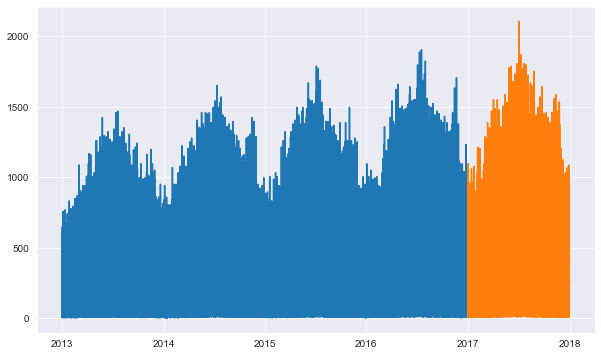

In [45]:
#visualise split
plt.plot(train.sales_total)
plt.plot(test.sales_total)
plt.show()

In [21]:
#set target
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01    218.40
2013-01-01    125.55
2013-01-01    453.60
2013-01-01    294.00
Name: sales_total, dtype: float64

Text(0.5, 0, 'total sales')

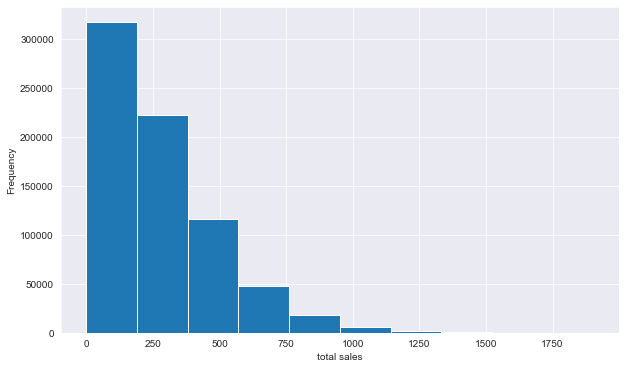

In [28]:
#visualise target
y.plot.hist()
plt.xlabel("total sales")

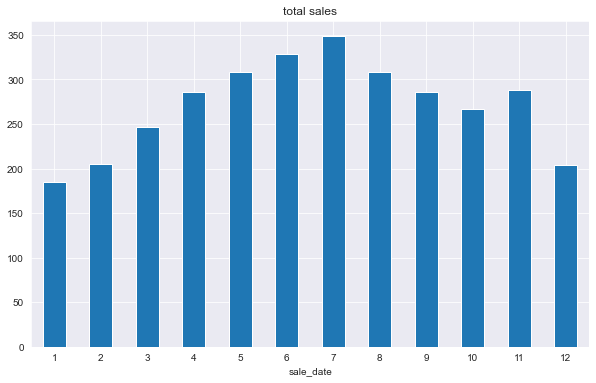

In [40]:
#plot total sales by months
y.groupby(y.index.month).mean().plot.bar(title="total sales")\
        .tick_params("x", rotation = 0)

    total sales peek in summer months

<function matplotlib.pyplot.show(close=None, block=None)>

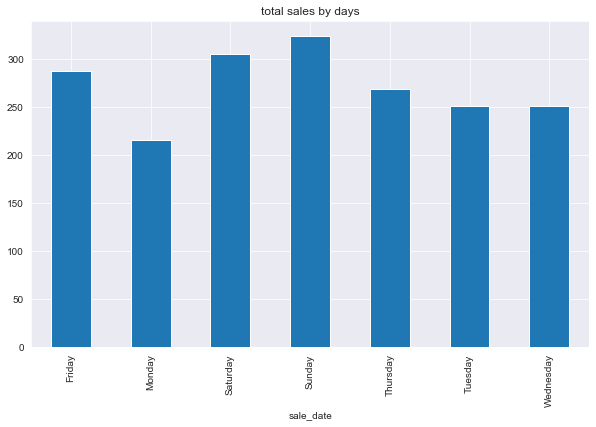

In [52]:
##plot total sales by day of week
y.groupby(y.index.day_name()).mean().plot.bar(title ="total sales by days")
plt.show

    saturaday, sunday seems to be the good day for business

how is total sales by different times  each year?

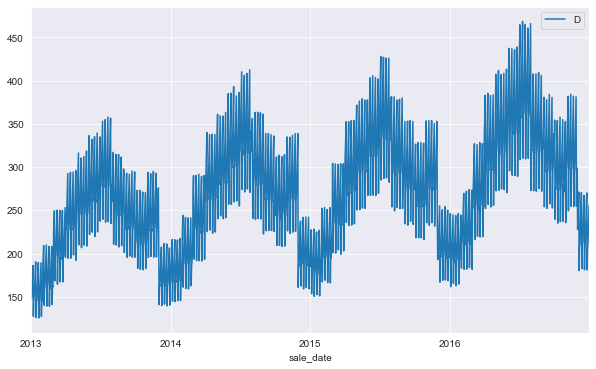

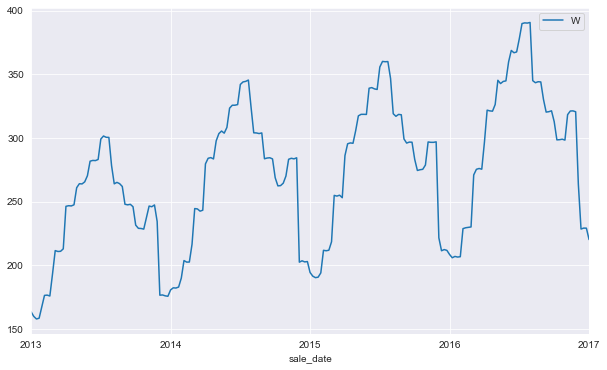

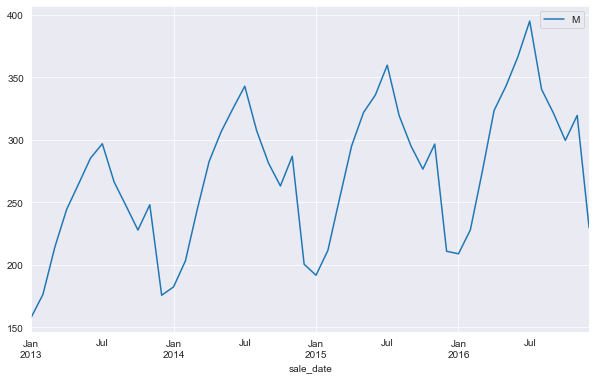

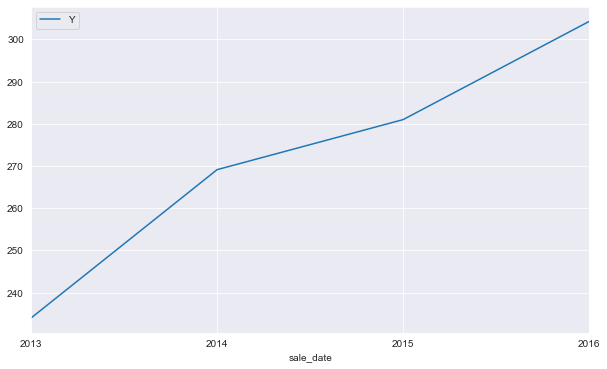

In [60]:
#make a for loop to visualise resample
different_times = ["D","W","M","Y"]
for i in different_times:
    y.resample(i).mean().plot(label = i)
    plt.legend()
    plt.show()

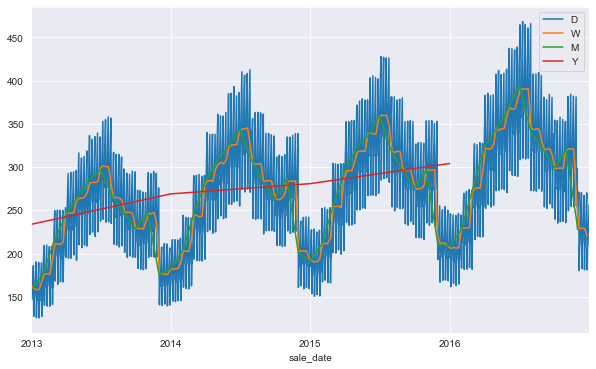

In [61]:
#for loop to visual all plot at one
different_times = ["D","W","M","Y"]
for i in different_times:
    y.resample(i).mean().plot(label = i)
    plt.legend()

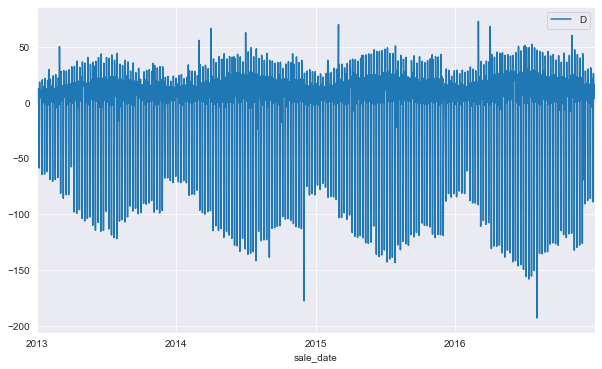

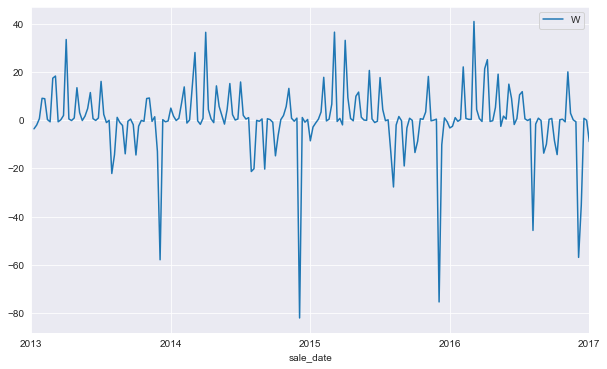

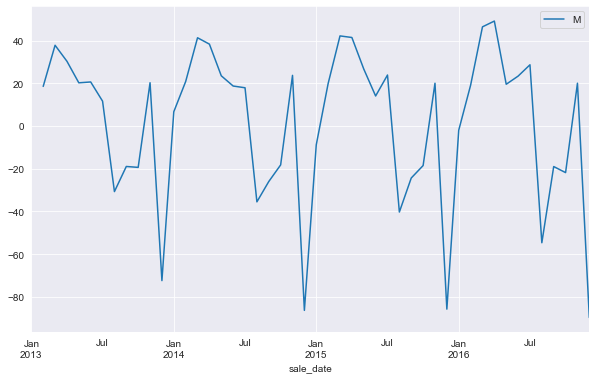

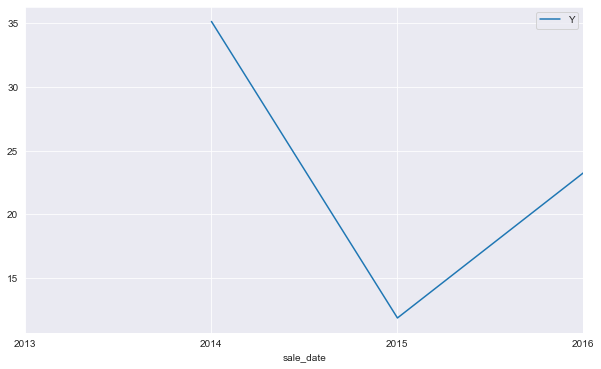

In [63]:
#make a for loop to visualise resample
different_times = ["D","W","M","Y"]
for i in different_times:
    y.resample(i).mean().diff().plot(label = i)
    plt.legend()
    plt.show()